In [1]:
import pandas as pd
import scipy 
from scipy import stats

##### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [2]:
data = pd.read_csv('Cutlets.csv')
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [41]:
data.head()

,Unit_A,Unit_B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [40]:
data.shape

(35, 2)

In [3]:
## Changing Column Names
data.columns = "Unit_A", "Unit_B"

In [4]:
### Printing P Values
print("P value of cutlet at Unit A",stats.shapiro(data.Unit_A))

print(" P value of cutlet at Unit B",stats.shapiro(data.Unit_B))

P value of cutlet at Unit A ShapiroResult(statistic=0.9649459719657898, pvalue=0.31998491287231445)
 P value of cutlet at Unit B ShapiroResult(statistic=0.9727305769920349, pvalue=0.5225146412849426)


In [5]:
## Variance Test

scipy.stats.levene(data.Unit_A,data.Unit_B)

print("Variance",scipy.stats.levene(data.Unit_A,data.Unit_B))

Variance LeveneResult(statistic=0.6650897638632386, pvalue=0.4176162212502553)


In [6]:
## 2 Sample T Test

scipy.stats.ttest_ind(data.Unit_A,data.Unit_B)
print("2 Sample T test Values",scipy.stats.ttest_ind(data.Unit_A,data.Unit_B))

2 Sample T test Values Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)


In [7]:
import matplotlib.pyplot as plt

In [8]:

labels = ['Unit_A', 'Unit_B']


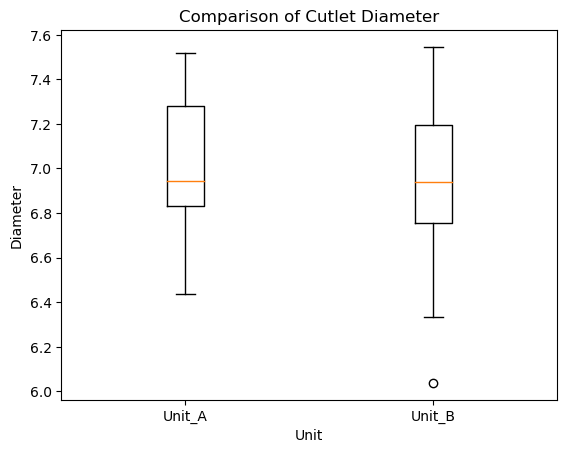

In [9]:
plt.boxplot(data, labels=labels)
plt.title('Comparison of Cutlet Diameter')
plt.xlabel('Unit')
plt.ylabel('Diameter')
plt.show()

##### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.


In [10]:
tat = pd.read_csv('LabTAT.csv')
tat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [42]:
tat.head()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [44]:
tat.shape

(120, 4)

In [11]:
tat.columns = "Laboratory_1" , "Laboratory_2" , "Laboratory_3" , "Laboratory_4"

In [12]:
# Normality Test
print("P value of Lab_1 data",stats.shapiro(tat.Laboratory_1))
print("P value of Lab_2 data",stats.shapiro(tat.Laboratory_2))
print("P value of Lab_3 data",stats.shapiro(tat.Laboratory_3))
print("P value of Lab_4 data",stats.shapiro(tat.Laboratory_4))

P value of Lab_1 data ShapiroResult(statistic=0.990183413028717, pvalue=0.5507769584655762)
P value of Lab_2 data ShapiroResult(statistic=0.9936320185661316, pvalue=0.8637352585792542)
P value of Lab_3 data ShapiroResult(statistic=0.988633930683136, pvalue=0.42045730352401733)
P value of Lab_4 data ShapiroResult(statistic=0.9913760423660278, pvalue=0.6619619131088257)


In [13]:
## Variance Test

print("Variance: ",scipy.stats.levene(tat.Laboratory_1,tat.Laboratory_2,tat.Laboratory_3,tat.Laboratory_4))

Variance:  LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)


In [14]:
# One - Way Anova
F, p = stats.f_oneway(tat.Laboratory_1,tat.Laboratory_2,tat.Laboratory_3,tat.Laboratory_4)
print("One way Anova result",F,p)

One way Anova result 118.70421654401437 2.1156708949992414e-57


#### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [16]:
buyer = pd.read_csv('BuyerRatio.csv')
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [45]:
buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [46]:
buyer.shape

(2, 5)

In [17]:
buyer_table = buyer.iloc[:,1:6]
buyer_table

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [18]:
buyer_table.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [19]:
value = stats.chi2_contingency(buyer_table)
value

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [20]:
type(value)

tuple

In [21]:
no_of_rows=len(buyer_table.iloc[0:2,0])
no_of_columns=len(buyer_table.iloc[0,0:4])
degree_of_f=(no_of_rows-1)*(no_of_columns-1)
print('Degree of Freedom=',degree_of_f)

Degree of Freedom= 3


In [22]:
expected_value = value[3]
expected_value

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [23]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(buyer_table.values,expected_value)])
chi_square_statestic=chi_square[0]+chi_square[1]
chi_square_statestic

1.5152956451130446

In [24]:
critical_value=chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [25]:
if chi_square_statestic >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [26]:
pvalue=1-chi2.cdf(chi_square_statestic,3)
pvalue

0.6787446296467897

In [27]:
if pvalue <= 0.05:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


#### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [28]:
import pandas as pd
from scipy import stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [29]:
df = pd.read_csv('costomer.csv')
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [47]:
df.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [48]:
df.shape

(300, 4)

In [30]:
print(df['Phillippines'].value_counts(),df['Indonesia'].value_counts(),df['Malta'].value_counts(),df['India'].value_counts())


Error Free    271
Defective      29
Name: Phillippines, dtype: int64 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 Error Free    269
Defective      31
Name: Malta, dtype: int64 Error Free    280
Defective      20
Name: India, dtype: int64


In [31]:
observed=([[271,267,269,280],[29,33,31,20]])
observed

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [32]:
stat, p, dof, expected = chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [33]:
stat

3.858960685820355

In [34]:
p

0.2771020991233135

In [35]:
dof

3

In [36]:
expected

array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]])

In [37]:
print('dof=%d' % dof)
print(expected)

dof=3
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [38]:
alpha = 0.05
prob=1-alpha
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0),variables are related')
else:
	print('Independent (fail to reject H0), variables are not related')

probability=0.950, critical=7.815, stat=3.859
Independent (fail to reject H0), variables are not related


In [39]:
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.277
Independent (fail to reject H0)
